(chpt:theory)=
# Theory

STUB

TODO: plotly HV wrappers, see https://github.com/executablebooks/jupyter-book/issues/1815

UPDATE: now in place, working in Render-debug notebook, but not here - even after clean build? Weird.

TODO: Fix plots (HV & plotly) in PDF output, currently missing here and Render-debug notebook.

17/11/22 Rendering now OK for Plotly, ongoing notes: https://github.com/phockett/Quantum-Metrology-with-Photoelectrons-Vol3/issues/2

(sect:theory:observables)=
## Observables: photoelectron flux in the LF and MF

The observables of interest - the photoelectron flux as a function of energy, ejection angle, and time - can be written quite generally as an expansion in spherical harmonics:

$$
\begin{align}
\bar{I}(\epsilon,t,\theta,\phi)=\sum_{L=0}^{2n}\sum_{M=-L}^{L}\bar{\beta}_{L,M}(\epsilon,t)Y_{L,M}(\theta,\phi)
\end{align}
$$ (eq:AF-PAD-general)

Here the flux in the laboratory frame (LF) or aligned frame (AF) is denoted $\bar{I}(\epsilon,t,\theta,\phi)$, with the bar signifying ensemble averaging, and the molecular frame flux by $I(\epsilon,t,\theta,\phi)$. Similarly, the expansion parameters $\bar{\beta}_{L,M}(\epsilon,t)$ include a bar for the LF/AF case. These observables are generally termed photoelectron angular distributions (PADs), often with a prefix denoting the reference frame, e.g. LFPADs, MFPADs, and the associated expansion parameters $\bar{\beta}_{L,M}(\epsilon,t)$ are generically termed "anisotropy\" parameters. The polar coordinate system $(\theta,\phi)$ is referenced to
an experimentally-defined axis in the LF/AF case (usually defined by the laser polarization), and the molecular symmetry axis in the MF. Some arbitrary examples are given in {numref}`fig-pads-example`, which illustrates both a range of distributions of increasing complexity, and some basic code to set $\beta_{L,M}$ parameters and visualise them; the values used as tabulated in  {numref}`blm-tab`.

In [1]:
# Run default config - may need to set full path here
%run '../scripts/setup_notebook.py'

# Override plotters backend?
# plotBackend = 'pl'

*** Setting up notebook with standard Quantum Metrology Vol. 3 imports...
For more details see https://pemtk.readthedocs.io/en/latest/fitting/PEMtk_fitting_basic_demo_030621-full.html
To use local source code, pass the parent path to this script at run time, e.g. "setup_fit_demo ~/github"
Running: 2022-11-18 15:59:00


* Loading packages...


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 
***xyzpy not found, parallel functions not available.
* Set Holoviews with bokeh.
Jupyter Book      : 0.13.1
External ToC      : 0.2.4
MyST-Parser       : 0.15.2
MyST-NB           : 0.13.2
Sphinx Book Theme : 0.3.3
Jupyter-Cache     : 0.4.3
NbClient          : 0.5.4


In [2]:
# Plot some distributions from specified BLMs

# Set specific LM coeffs by list with setBLMs, items are [l,m,value]
from epsproc.sphCalc import setBLMs

# BLM = setBLMs([[0,0,1],[1,1,1],[2,2,1]])
# BLM = setBLMs([[0,0,1,1,1],[1,1,1,0.5,0.2],[2,2,1,1,0.2]])   # Note different index
BLM = setBLMs([[0,0,1,1,1,1],[1,1,0,0.5,0.8,1],[2,0,1,0.5,0,0],
               [4,2,0,0,0,0.5],[4,-2,0,0,0,0.5]])

# Set the backend to 'pl' for an interactive surface plot with Plotly
# NOTE PL FIG RETURN BROKEN FOR THIS CASE (ePSproc v1.3.1), so run sphSumPlotX too.
dataPlot, figObj = ep.sphFromBLMPlot(BLM, facetDim='t', plotFlag = False, backend = plotBackend);
figObj = ep.sphSumPlotX(dataPlot,facetDim='t', plotFlag = False, backend = plotBackend);

# And GLUE for display later with caption
# from myst_nb import glue
# glue("padExamplePlot", figObj[0], display=False);
# Glue with Plotly wrapper.
# gluePlotly("padExamplePlot", figObj[0])   # Working in Render test notebook, but not here? Issue with subplots?

# Test in separate cell...
gluePlotly("padExamplePlot", figObj[0])   # Working in Render test notebook, but not here? Issue with subplots?

Using complex betas (from BLMX array).
*** WARNING: plot dataset has min value < 0, min = (-0.3949983357021907+0j). This may be unphysical and/or result in plotting issues.
Sph plots: 
Plotting with facetDims=t, pType=a with backend=pl.
*** Plotting for [1,1,0]
*** Plotting for [1,2,1]
*** Plotting for [1,3,2]
*** Plotting for [1,4,3]


```{glue:figure} padExamplePlot
---
name: "fig-pads-example"
---
Examples of angular distributions (expansions in spherical harmonics $Y_{L,M}$), for a range of cases. Note that up-down asymmetry is associated with odd-$l$ contributions, and breaking of cylindrical symmetry with $m\neq0$ terms.
```

In [3]:
# Example using data class (setup in init script)
data = pemtkFit()
# data.setData('BLMtest',setBLMs([[0,0,1,1],[1,1,0,1],[2,2,1,1]]))   # Note different index
# data.setData(np.array([[0,0,1],[1,1,1],[2,2,1]]))   # Note different index

BLM = setBLMs([[0,0,1,1,1,1],[1,0,0,0.5,0.8,1],[2,0,1,0.5,0,0],
               [4,2,0,0,0,0.5],[4,-2,0,0,0,0.5]])

data.setData('BLMtest', BLM)
data.padPlot(keys = 'BLMtest', dataType='AFBLM', Etype='t', backend=plotBackend, plotFlag=False, returnFlag=True)  # Working
figObj = data.data['BLMtest']['plots']['AFBLM']['polar'][0]

# And GLUE for display later with caption
# from myst_nb import glue
# glue("padExamplePlot2", figObj, display=False);
gluePlotly("padExamplePlot2", figObj)

Using complex betas (from BLMX array).
Summing over dims: set()
Plotting from self.data[BLMtest][AFBLM], facetDims=['t', None], pType=a with backend=pl.
*** WARNING: plot dataset has min value < 0, min = (-0.5269701229350612-1.734723475976807e-18j). This may be unphysical and/or result in plotting issues.
Set plot to self.data['BLMtest']['plots']['AFBLM']['polar']


% ```{glue:figure} padExamplePlot2
% ---
% name: "fig-pads-example-class"
% ---
% Examples of angular distributions (expansions in spherical harmonics $Y_{L,M}$), for a range of cases.
% ```

In [4]:
# 1D only!
# from epsproc.sphFuncs.sphConv import tabulateLM
# tabulateLM(BLM.unstack())

from epsproc.util import multiDimXrToPD

dataPD, _ = multiDimXrToPD(BLM, colDims='t')
# dataPD
glue("blm-tab", dataPD, display=False);

```{glue:figure} blm-tab
:figwidth: 300px
:name: "blm-tab"

Values used for the plots in {numref}`fig-pads-example`
```

In general, the spherical harmonic rank and order $(L,M)$ of Eq. {eq}`eq:AF-PAD-general` are constrained by experimental factors in the LF/AF, and $n$ is effectively limited by the molecular alignment (which is correlated with the photon-order for gas phase experiments, or conservation of angular momentum in the LF more generally {cite}`Yang1948`), but in the MF is defined by the maximum continuum angular momentum $n=l_{max}$ imparted by the scattering event {cite}`Dill1976`.

For basic cases these limits may be low: for instance, a simple 1-photon photoionization event ($n=1$) from an isotropic ensemble (zero net ensemble angular momentum) defines $L_{max}=2$; for cylindrically symmetric cases (i.e. $D_{\infty h}$ symmetry) $M=0$ only. For MF cases, $l_{max}=4$ is often given as a reasonable rule-of-thumb for the continuum - hence $L_{max}=8$ - although in practice higher-$l$ may be populated. Some realistic example cases are discussed later (**PART II**), see also ref. {cite}`hockett2018QMP1` for more discussion and complex examples.

In general, these observables may also be dependent on various other parameters; in Eq. {eq}`eq:AF-PAD-general` two such parameters, $(\epsilon,t)$, are included, as the usual variables of interest. Usually $\epsilon$ denotes the photoelectron energy, and $t$ is used in the case of time-dependent (usually pump-probe) measurements. As discussed below ({numref}`Sect. %s <sec:dynamics-intro>`), the origin of such dependencies may be complicated but, in general, the associated photoionization matrix elements are energy-dependent, and time-dependence may also appear for a number of intrinsic or extrinsic (experimental) reasons, e.g. electronic or nuclear dynamics, rotational (alignment) dynamics, electric field dynamics etc. In many cases only one particular aspect may be of interest, so $t$ can be used as a generic label to index changes as per {numref}`fig-pads-example`.

(sec:theory:sym-harm-into)=
### Symmetrized harmonics

Symmetrized (or generalised) harmonics, which essentially provide correctly symmetrized expansions of spherical harmonics ($Y_{lm}$) functions for a given irreducible representation, $\Gamma$, can be defined by linear combinations of spherical harmonics (Refs. {cite}`Altmann1963,Altmann1965,Chandra1987` as below):

\begin{equation}
X_{hl}^{\Gamma\mu*}(\theta,\phi)=\sum_{\lambda}b_{hl\lambda}^{\Gamma\mu}Y_{l,\lambda}(\theta,\phi)\label{eq:symm-harmonics}
\end{equation}


where: 
    
- $\Gamma$ is an irreducible representation, 
- ($l$, $\lambda$) define the usual spherical harmonic indicies (rank, order)
- $b_{hl\lambda}^{\Gamma\mu}$ are symmetrization coefficients, 
- index $\mu$ allows for indexing of degenerate components,
- $h$ indexs cases where multiple components are required with all other quantum numbers identical. 
    
The exact form of these coefficients will depend on the point-group of the system, see, e.g. Refs. {cite}`Chandra1987,Reid1994`. Numerical routines for the generation of symmetrized harmonics are implemented in PEMtk: point-groups, character table generation and symmetrization (computing $b_{hl\lambda}^{\Gamma\mu}$ parameters) is handled by {{ libmsym }}; additional handling also makes use of {{ shtools }}. A brief example is given below, see the {{ PEMtk_docs }} for more details.

In [5]:
# Import class
from pemtk.sym.symHarm import symHarm

# Compute hamronics for Td, lmax=4
symObj = symHarm('Td',4)

# Character tables can be displayed
symObj.printCharacterTable()

,,E,C2^1,S4^1,σd,C3^1
Character,dim,,,,,
A1,1,1.0,1.0,1.0,1.0,1.0
A2,1,1.0,1.0,-1.0,-1.0,1.0
E,2,2.0,2.0,0.0,0.0,-1.0
T1,3,3.0,-1.0,1.0,-1.0,0.0
T2,3,3.0,-1.0,-1.0,1.0,0.0


In [9]:
# The full set of expansion parameters can be tabulated
# pd.set_option('display.max_rows', 1)
symObj.displayXlm()  # Display values (note this defaults to REAL harmonics)
# symObj.displayXlm(YlmType='comp')   # Display values for COMPLEX harmonic expansion.

Remapped dims: {'C': 'Cont', 'h': 'it', 'mu': 'muX'}
Added dim Eke
Added dim P
Added dim T
Added dim C
Using default sph betas.
Summing over dims: {'it'}
Found additional dims {'muX'}, summing to reduce for plot. Pass selDims to avoid.
Plotting from self.data[symHarm][BLM], facetDims=['Cont', None], pType=a with backend=pl.
*** WARNING: plot dataset has min value < 0, min = (-2.0387231263496393+0j). This may be unphysical and/or result in plotting issues.


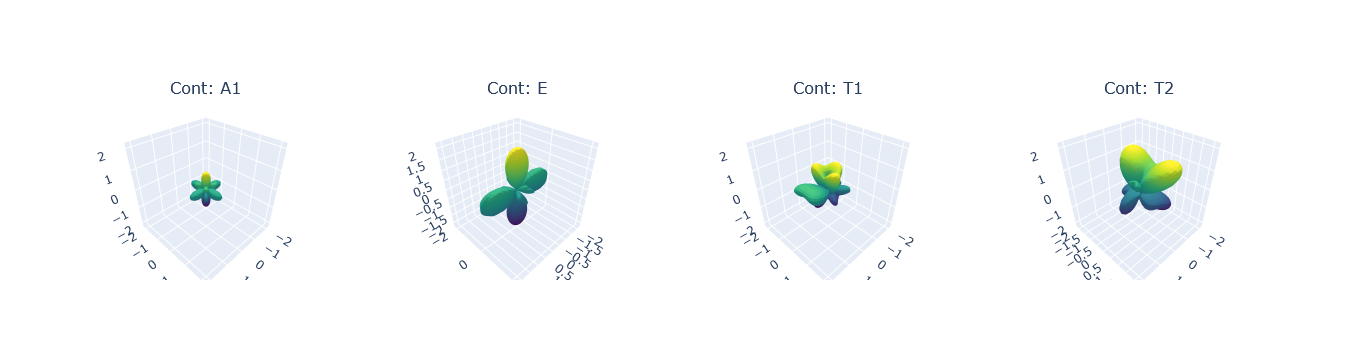

In [21]:
# To plot using ePSproc/PEMtk class, these values can be converted to ePSproc BLM data type...

# Run conversion - the default is to set the coeffs to the 'BLM' data type
symObj.toePSproc()

# Set to new key in data class
data.data['symHarm'] = {}

for dataType in ['BLM']:  #['matE','BLM']:
    data.data['symHarm'][dataType] = symObj.coeffs[dataType]['b (comp)']  # Select expansion in complex harmonics
    data.data['symHarm'][dataType].attrs = symObj.coeffs[dataType].attrs
    
# Plot full harmonics expansions, plots by symmetry
# Note 'squeeze=True' to force drop of singleton dims may be required.
# data.padPlot(keys='symHarm',dataType='BLM', facetDims = ['Cont'], squeeze = True, backend=plotBackend)

data.padPlot(keys='symHarm',dataType='BLM', facetDims = ['Cont'], squeeze = True, backend=plotBackend, plotFlag=False, returnFlag=True)  # Working
figObj = data.data['symHarm']['plots']['BLM']['polar'][0]

# And GLUE for display later with caption
# from myst_nb import glue
# glue("padExamplePlot2", figObj, display=False);
gluePlotly("symHarmPADs", figObj)

```{glue:figure} symHarmPADs
---
name: "fig-symHarmPADs-example"
---
Examples of angular distributions from expansions in symmetrized harmonics $X_{hl}^{\Gamma\mu*}(\theta,\phi)$, for all representations in $Td$ symmetry.
```

(sec:dynamics-intro)=
## Photoionization dynamics

The core physics of photoionization has been covered extensively in the literature, and only a very brief overview is provided here with sufficient detail to introduce the metrology/reconstruction/retrieval problem; the reader is referred to Vol. 1 {cite}`hockett2018QMP1` (and refs. therein) for further details and general discussion.
% the literature listed in Appendix [\[sec:theory-lit\]](#sec:theory-lit){reference-type="ref" reference="sec:theory-lit"} for further details and general discussion.
% Technical details of the formalism applied for the reconstruction techniques discussed herein can be found in Sect. [\[sec:tensor-formulation\]](#sec:tensor-formulation){reference-type="ref" reference="sec:tensor-formulation"}.

Photoionization can be described by the coupling of an initial state of the system to a particular final state (photoion(s) plus free photoelectron(s)), coupled by an electric field/photon. Very generically, this can be written as a matrix element $\langle\Psi_i|\hat{\Gamma}(\boldsymbol{\mathbf{E}})|\Psi_f\rangle$, where $\hat{\Gamma}(\boldsymbol{\mathbf{E}})$ defines the light-matter coupling operator (depending on the electric field $\boldsymbol{\mathbf{E}}$), and $\Psi_i$, $\Psi_f$ the total wavefunctions of the initial and final states respectively.

Quick maths test - see formatting test doc for more details.

$\boldsymbol{\mathbf{E}}$

$\mathbf{E}$

$\boldsymbol{E}$ or $\mathbf{E}$ or $\bm{E}$ should be equivalent.

$$\hat{\Gamma}(\boldsymbol{\mathbf{E}}) = \hat{\mathbf{\mu}}.\boldsymbol{\mathbf{E}}$$

$$\Psi_\mathbf{k}(\bm{r})\equiv\left<\bm{r}|\mathbf{k}\right> = \sum_{lm}Y_{lm}(\mathbf{\hat{k}})\psi_{lm}(\bm{r},k)
\label{eq:elwf}$$